# Academic Integrity Statement

### I (we) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work.

# PART-2 **LOGISTIC REGRESSION**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Setting seed value for random number generator, to reproduce the result
seed_val = 574

In [23]:
penguin_df = pd.read_csv("penguins.csv")
penguin_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [24]:
#checking for null values.
penguin_df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [25]:
# There are very few null/NaN values, approximately 3% of the total samples has null values.
# Therefore, dropping the rows with null values
penguin_df = penguin_df.dropna()
penguin_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [ ]:
#type casting species,island and Sex columns to categorical
penguin_df['species'] = pd.Categorical(penguin_df.species)
penguin_df['island'] = pd.Categorical(penguin_df.island)
penguin_df['sex'] = pd.Categorical(penguin_df.sex)
penguin_df['year'] = pd.Categorical(penguin_df.year)

In [27]:
penguin_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [51]:
penguin_df.year.unique()

[2007, 2008, 2009]
Categories (3, int64): [2007, 2008, 2009]

In [29]:
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
 7   year               333 non-null    category
dtypes: category(4), float64(4)
memory usage: 14.8 KB


In [30]:
# replacing sex values with 0s and 1s
penguin_df['sex'].replace(['female', 'male'],  # female = 0; male = 1
                        [0, 1], inplace=True)

# One hot encoding categorical columns
onehotencoded = pd.get_dummies(data=penguin_df, columns=['species', 'island', 'year'])

onehotencoded.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,year_2007,year_2008,year_2009
0,39.1,18.7,181.0,3750.0,1,1,0,0,0,0,1,1,0,0
1,39.5,17.4,186.0,3800.0,0,1,0,0,0,0,1,1,0,0
2,40.3,18.0,195.0,3250.0,0,1,0,0,0,0,1,1,0,0
4,36.7,19.3,193.0,3450.0,0,1,0,0,0,0,1,1,0,0
5,39.3,20.6,190.0,3650.0,1,1,0,0,0,0,1,1,0,0


In [31]:
processed_df = onehotencoded.copy()

num_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

# Rescaling numeric columns to the range [0,1]
processed_df[num_cols]=((processed_df[num_cols] - processed_df[num_cols].min())/
                        (processed_df[num_cols].max() - processed_df[num_cols].min()))
processed_df.head(10)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,year_2007,year_2008,year_2009
0,0.254545,0.666667,0.152542,0.291667,1,1,0,0,0,0,1,1,0,0
1,0.269091,0.511905,0.237288,0.305556,0,1,0,0,0,0,1,1,0,0
2,0.298182,0.583333,0.389831,0.152778,0,1,0,0,0,0,1,1,0,0
4,0.167273,0.738095,0.355932,0.208333,0,1,0,0,0,0,1,1,0,0
5,0.261818,0.892857,0.305085,0.263889,1,1,0,0,0,0,1,1,0,0
6,0.247273,0.559524,0.152542,0.256944,0,1,0,0,0,0,1,1,0,0
7,0.258182,0.773810,0.389831,0.548611,1,1,0,0,0,0,1,1,0,0
12,0.327273,0.535714,0.169492,0.138889,0,1,0,0,0,0,1,1,0,0
13,0.236364,0.964286,0.322034,0.305556,1,1,0,0,0,0,1,1,0,0
14,0.090909,0.952381,0.440678,0.472222,1,1,0,0,0,0,1,1,0,0


In [32]:
processed_df.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'sex', 'species_Adelie', 'species_Chinstrap', 'species_Gentoo',
       'island_Biscoe', 'island_Dream', 'island_Torgersen', 'year_2007',
       'year_2008', 'year_2009'],
      dtype='object')

In [55]:
# Splitting the dataset into training (80%) and testing (20%)
train_df = processed_df.sample(frac=0.8, random_state=10)
test_df = processed_df.drop(train_df.index)

In [56]:
# target counts in train and test data
print("1s and 0s count in train data - ")
print(train_df.sex.value_counts(), end="\n\n")

print("1s and 0s count in test data - ")
print(test_df.sex.value_counts())

1s and 0s count in train data - 
1    134
0    132
Name: sex, dtype: int64

1s and 0s count in test data - 
1    34
0    33
Name: sex, dtype: int64


In [35]:
y_train = train_df['sex'].values
X_train = train_df.drop(['sex'], axis=1).values

y_test = test_df['sex'].values
X_test = test_df.drop(['sex'], axis=1).values

In [36]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((266, 13), (266,), (67, 13), (67,))

In [58]:
class LogisticRegression:

  def __init__(self, learning_rate=0.01, num_iterations=1000, bias=False, seed=seed_val):
    np.random.seed(seed)
    self.learning_rate = learning_rate  
    self.num_iterations = num_iterations  #  number of iterations of the gradient descent
    self.bias = bias  
    self.loss = []


  def add_bias(self, X):
    bias_vector = np.ones((X.shape[0], 1))  #  creating bias vector (N x 1), where N is the number of samples
    return np.concatenate((bias_vector, X), axis=1)  # concatenating bias vector with features


  def get_loss(self):
    # return training loss
    return self.loss


  def get_weights(self):
    return self.weights


  def sigmoid(self, z):
    ''' 
    Activation function
      parameters:
        z - matrix, product of features and weights
      return:
        value in the range [0,1]
    '''
    return 1 / (1 + np.exp(-z))


  def cost(self, X, y):
    '''
      Loss function for Logistic Regression
      parameters:
        X - input features
        y - target vector
      return:
        loss value
    '''
    z = np.dot(X, self.weights)  #  Dot product of the weights and feature matrix
    y_hat = self.sigmoid(z)
    return (-y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)).mean()


  def gradient_descent(self, X, y):
    '''
      Gradient Descent - for weights update
    '''
    z = np.dot(X, self.weights)  #  Dot product of the weights and feature matrix
    y_hat = self.sigmoid(z)
    gradient = np.dot(X.T, (y_hat - y)) / y.size # Derivate of the loss function
    self.weights -= self.learning_rate * gradient
  

  def fit(self, X, y):
    '''
      parameters:
        X - input features (N x D) N samples , D features
        y - target value - binary (1/0) (N x 1)
      return:
        None
    '''

    if self.bias:
      X = self.add_bias(X)
      
    #  initializing weights vector with random values in the range [0,1] from uniform distribution
    self.weights = [np.random.uniform(0,1) for i in range(X.shape[1])] #np.zeros(X.shape[1]) 

    for i in range(self.num_iterations):
      self.gradient_descent(X, y)
      cost_fn = self.cost(X, y)
      self.loss.append(cost_fn)

      if (i % 1000 == 0):
        print(f'Iteration {i}, loss: {cost_fn} \t')


  def predict(self, X):  
      pred = self.sigmoid(np.dot(X, self.weights))
      # 1 if pred >= 0.5 else 0
      return [1 if x >= 0.5 else 0 for x in pred.flatten()]


  def accuracy_score(self, y_test, y_pred):
    return ((y_test == y_pred).sum()/len(y_pred))*100

In [67]:
# LogisticRegression class instance
model = LogisticRegression(learning_rate=0.1, num_iterations=50000, seed=seed_val) 

# Train the model
model.fit(X_train, y_train)

Iteration 0, loss: 1.289633973657701 	
Iteration 1000, loss: 0.482314059319971 	
Iteration 2000, loss: 0.38760392861860943 	
Iteration 3000, loss: 0.3374059825627817 	
Iteration 4000, loss: 0.3062996984378 	
Iteration 5000, loss: 0.2850159871138856 	
Iteration 6000, loss: 0.2694559410839266 	
Iteration 7000, loss: 0.2575356337989387 	
Iteration 8000, loss: 0.2480825439844338 	
Iteration 9000, loss: 0.24038488175579908 	
Iteration 10000, loss: 0.23398441601345416 	
Iteration 11000, loss: 0.22857207355626374 	
Iteration 12000, loss: 0.22393134766120923 	
Iteration 13000, loss: 0.21990575335235044 	
Iteration 14000, loss: 0.21637917446720453 	
Iteration 15000, loss: 0.21326349898115962 	
Iteration 16000, loss: 0.21049056350577794 	
Iteration 17000, loss: 0.20800674509831177 	
Iteration 18000, loss: 0.2057692342190637 	
Iteration 19000, loss: 0.20374340662516222 	
Iteration 20000, loss: 0.20190093216105687 	
Iteration 21000, loss: 0.20021838898088443 	
Iteration 22000, loss: 0.198676231519

In [68]:
# Updated weights after iterations
model.get_weights()

array([12.49303361, 12.62022163,  2.25943965, 15.10333624, -2.96043356,
       -8.65512727, -8.17082542, -6.64249425, -6.42110996, -6.91064675,
       -6.12574316, -6.17622579, -6.51558619])

In [69]:
# Prediction
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Accuracy in %
train_score = model.accuracy_score(y_train, y_pred_train)
test_score = model.accuracy_score(y_test, y_pred_test)

print(f'Accuracy on Train data = {train_score:.3f} %')
print(f'Accuracy on Test data = {test_score:.3f} %')

Accuracy on Train data = 93.609 %
Accuracy on Test data = 89.552 %


Text(0, 0.5, 'Training loss')

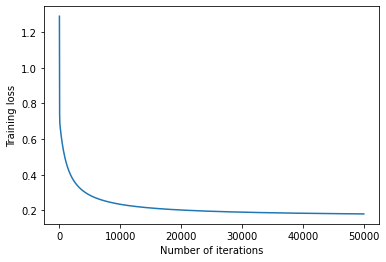

In [70]:
# Training loss plot for iterations
plt.plot(model.get_loss())
plt.xlabel("Number of iterations")
plt.ylabel("Training loss")

# References

Numpy Documentation - https://numpy.org/doc/stable/reference/

Pandas Documentation - https://pandas.pydata.org/docs/reference/

Matplotlib Documentation - https://matplotlib.org/stable/index.html#matplotlib-release-documentation

Python Documentation - https://docs.python.org/3.9/library/index.html

Penguin Dataset - https://www.kaggle.com/parulpandey/penguin-dataset-the-new-iris

Lecture slides  titled 'Perceptrons and Logistic Regression'